In [1]:
import kagglehub
import pandas as pd
import os

# Try to download the dataset with timeout handling
try:
    print("Attempting to download dataset from Kaggle...")
    path = kagglehub.dataset_download("mexwell/crop-price-prediction-in-senegal")
    print("Path to dataset files:", path)
    csv_file = path + "/_Croppricepredictionsenegal_wfp_food_prices_senegal.csv"
except Exception as e:
    print(f"Failed to download from Kaggle: {e}")
    print("Looking for local dataset file...")
    # Check if CSV exists locally
    local_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    if local_files:
        csv_file = local_files[0]
        print(f"Using local file: {csv_file}")
    else:
        raise Exception("No local CSV file found and Kaggle download failed. Please ensure the dataset is available locally or check your internet connection.")

df = pd.read_csv(csv_file)
df.head()

Attempting to download dataset from Kaggle...
Path to dataset files: /Users/aaronarquillano/.cache/kagglehub/datasets/mexwell/crop-price-prediction-in-senegal/versions/1
Path to dataset files: /Users/aaronarquillano/.cache/kagglehub/datasets/mexwell/crop-price-prediction-in-senegal/versions/1


,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2007-01-15,Maize (local) - Retail,KG,cereals and tubers,160.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
2,2007-03-15,Maize (local) - Retail,KG,cereals and tubers,100.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
3,2007-04-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
4,2007-05-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN


In [2]:
df.isnull().sum()

date            0
cmname          0
unit            0
category        0
price           0
currency        0
country         0
admname         0
adm1id          0
mktname         0
mktid           1
cmid            0
ptid            1
umid            1
catid           0
sn              0
default     31807
dtype: int64

In [3]:
df = df.drop(columns=['cmid', 'mktid', 'adm1id', 'umid', 'catid', 'sn', 'default', 'ptid'])
display(df.head())

,date,cmname,unit,category,price,currency,country,admname,mktname
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#name+market
1,2007-01-15,Maize (local) - Retail,KG,cereals and tubers,160.0,XOF,Senegal,Kedougou,Kedougou
2,2007-03-15,Maize (local) - Retail,KG,cereals and tubers,100.0,XOF,Senegal,Kedougou,Kedougou
3,2007-04-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,Kedougou
4,2007-05-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,Kedougou


In [4]:
df.isnull().sum()

date        0
cmname      0
unit        0
category    0
price       0
currency    0
country     0
admname     0
mktname     0
dtype: int64

In [5]:
df = df.iloc[1:].copy()
df['price'] = pd.to_numeric(df['price'])
print(df['price'].dtype)
display(df['price'].describe())

float64


count    31806.000000
mean       239.509762
std         70.041993
min         90.000000
25%        197.500000
50%        229.000000
75%        275.000000
max       1200.000000
Name: price, dtype: float64

In [6]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
display(df.head())

datetime64[ns]


,date,cmname,unit,category,price,currency,country,admname,mktname
1,2007-01-15,Maize (local) - Retail,KG,cereals and tubers,160.0,XOF,Senegal,Kedougou,Kedougou
2,2007-03-15,Maize (local) - Retail,KG,cereals and tubers,100.0,XOF,Senegal,Kedougou,Kedougou
3,2007-04-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,Kedougou
4,2007-05-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,Kedougou
5,2007-07-15,Maize (local) - Retail,KG,cereals and tubers,190.0,XOF,Senegal,Kedougou,Kedougou


In [7]:
# Identify categorical columns to encode
categorical_cols = ['cmname', 'unit', 'category', 'currency', 'country', 'admname', 'mktname']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,date,price,cmname_Groundnuts (shelled) - Retail,cmname_Groundnuts (unshelled) - Retail,cmname_Maize (imported) - Retail,cmname_Maize (local) - Retail,cmname_Millet - Retail,cmname_Rice (imported) - Retail,cmname_Rice (local) - Retail,"cmname_Rice (ordinary, first quality) - Retail",...,mktname_Thiaroye,mktname_Thies,mktname_Thille Boubacar,mktname_Thilmakha,mktname_Thiodaye,mktname_Tilene,mktname_Touba,mktname_Touba Toul,mktname_Velingara,mktname_Zigiunchor
1,2007-01-15,160.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2007-03-15,100.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2007-04-15,200.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007-05-15,200.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2007-07-15,190.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
import numpy as np

df['log_price'] = np.log1p(df['price'])
display(df[['price', 'log_price']].head())

,price,log_price
1,160.0,5.081404
2,100.0,4.615121
3,200.0,5.303305
4,200.0,5.303305
5,190.0,5.252273


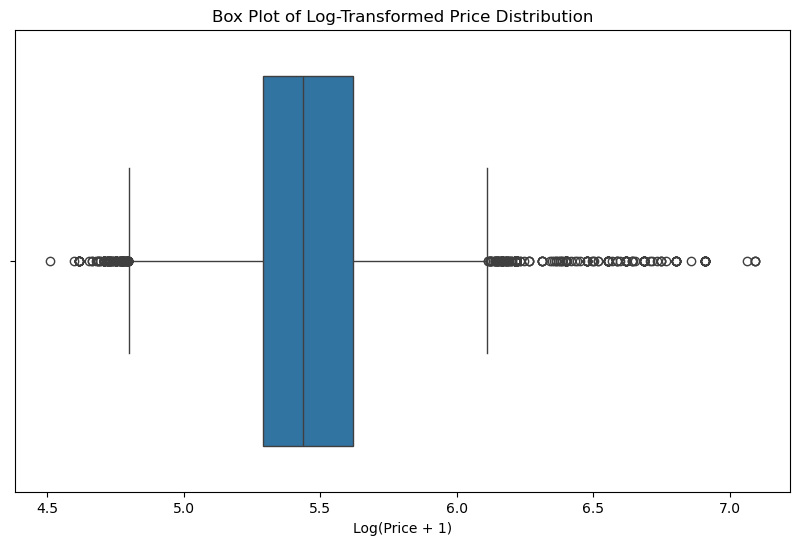

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'])
plt.title('Box Plot of Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.show()

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6

display(df.head())

,date,price,cmname_Groundnuts (shelled) - Retail,cmname_Groundnuts (unshelled) - Retail,cmname_Maize (imported) - Retail,cmname_Maize (local) - Retail,cmname_Millet - Retail,cmname_Rice (imported) - Retail,cmname_Rice (local) - Retail,"cmname_Rice (ordinary, first quality) - Retail",...,mktname_Tilene,mktname_Touba,mktname_Touba Toul,mktname_Velingara,mktname_Zigiunchor,log_price,year,month,day,day_of_week
1,2007-01-15,160.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,5.081404,2007,1,15,0
2,2007-03-15,100.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,4.615121,2007,3,15,3
3,2007-04-15,200.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,5.303305,2007,4,15,6
4,2007-05-15,200.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,5.303305,2007,5,15,1
5,2007-07-15,190.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,5.252273,2007,7,15,6


In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['date', 'price', 'log_price'])
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25444, 90)
X_test shape: (6362, 90)
y_train shape: (25444,)
y_test shape: (6362,)


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Convert boolean columns to integer (0 or 1)
X_train_numeric = X_train.copy()
for col in X_train_numeric.select_dtypes(include='bool').columns:
    X_train_numeric[col] = X_train_numeric[col].astype(int)

# Add a constant to the DataFrame for VIF calculation
X_train_const = add_constant(X_train_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# Sort by VIF in descending order and display
display(vif_data.sort_values(by='VIF', ascending=False))

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
45,mktname_Keur I. Yacine,inf
41,mktname_Gueule Tapee,inf
62,mktname_Orkodiere,inf
61,mktname_Ndrame Escale,inf
60,mktname_Ndindy,inf
...,...,...
0,cmname_Groundnuts (shelled) - Retail,1.066029
1,cmname_Groundnuts (unshelled) - Retail,1.059080
87,month,1.009177
89,day_of_week,1.006880


In [13]:
print(f"Variance of 'day' column in X_train: {X_train['day'].var()}")

Variance of 'day' column in X_train: 0.0


In [14]:
# Remove the 'day' column which had zero variance after a fresh split
X_train = X_train.drop(columns=['day'])
X_test = X_test.drop(columns=['day'])

print("Current X_train shape:", X_train.shape)
print("Current X_test shape:", X_test.shape)

Current X_train shape: (25444, 89)
Current X_test shape: (6362, 89)


In [15]:
# Calculate correlations between features and y_train
correlations = X_train.corrwith(y_train).sort_values(ascending=False)

print("Top 10 positively correlated features with log_price:")
display(correlations.head(10))

print("\nTop 10 negatively correlated features with log_price:")
display(correlations.tail(10))

Top 10 positively correlated features with log_price:


cmname_Rice (imported) - Retail                   0.466990
year                                              0.345874
category_pulses and nuts                          0.319398
cmname_Rice (ordinary, first quality) - Retail    0.235298
cmname_Rice (local) - Retail                      0.172173
admname_Ziguinchor                                0.136525
admname_Matam                                     0.110487
admname_Kedougou                                  0.101641
cmname_Groundnuts (shelled) - Retail              0.085569
mktname_Bignona                                   0.084311
dtype: float64


Top 10 negatively correlated features with log_price:


mktname_Ndrame Escale              -0.073520
admname_Kaffrine                   -0.099936
mktname_Kouthiaba                  -0.101571
admname_Tambacounda                -0.108363
mktname_Mereto                     -0.112172
admname_Kaolack                    -0.121802
cmname_Sorghum - Retail            -0.138603
cmname_Maize (imported) - Retail   -0.148893
cmname_Millet - Retail             -0.222630
cmname_Maize (local) - Retail      -0.263852
dtype: float64

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor model
# Using default parameters for initial exploration, can be tuned later
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on the training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f"Random Forest Regressor Model Trained on X_train:")
print(f"Mean Squared Error (Training): {mse_train_rf:.4f}")
print(f"R-squared (Training): {r2_train_rf:.4f}")

Random Forest Regressor Model Trained on X_train:
Mean Squared Error (Training): 0.0008
R-squared (Training): 0.9878


In [17]:
# Make predictions on the testing set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the testing set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regressor Model Performance on X_test:")
print(f"Mean Squared Error (Testing): {mse_test_rf:.4f}")
print(f"R-squared (Testing): {r2_test_rf:.4f}")


Random Forest Regressor Model Performance on X_test:
Mean Squared Error (Testing): 0.0055
R-squared (Testing): 0.9161


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the testing set with the best model
y_test_pred_optimized_rf = rf_model.predict(X_test)

# Evaluate the optimized model on the testing set
mse_test_optimized_rf = mean_squared_error(y_test, y_test_pred_optimized_rf)
r2_test_optimized_rf = r2_score(y_test, y_test_pred_optimized_rf)

print(f"\nOptimized Random Forest Regressor Model Performance on X_test:")
print(f"Mean Squared Error (Testing): {mse_test_optimized_rf:.4f}")
print(f"R-squared (Testing): {r2_test_optimized_rf:.4f}")


Optimized Random Forest Regressor Model Performance on X_test:
Mean Squared Error (Testing): 0.0055
R-squared (Testing): 0.9161

Mean Squared Error (Testing): 0.0055
R-squared (Testing): 0.9161


In [19]:
df_raw = pd.read_csv(path + "/_Croppricepredictionsenegal_wfp_food_prices_senegal.csv")
print("Loaded raw DataFrame:")
df_raw.head()

Loaded raw DataFrame:


,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2007-01-15,Maize (local) - Retail,KG,cereals and tubers,160.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
2,2007-03-15,Maize (local) - Retail,KG,cereals and tubers,100.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
3,2007-04-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN
4,2007-05-15,Maize (local) - Retail,KG,cereals and tubers,200.0,XOF,Senegal,Kedougou,1374,Kedougou,419.0,56,15.0,5.0,1,419_56_15_5,NaN


In [20]:
cmname_options = df_raw['cmname'].unique().tolist()
unit_options = df_raw['unit'].unique().tolist()
category_options = df_raw['category'].unique().tolist()
admname_options = df_raw['admname'].unique().tolist()
mktname_options = df_raw['mktname'].unique().tolist()

print("Unique cmname values (first 5):", cmname_options[:5])
print("Unique unit values (first 5):", unit_options[:5])
print("Unique category values (first 5):", category_options[:5])
print("Unique admname values (first 5):", admname_options[:5])
print("Unique mktname values (first 5):", mktname_options[:5])

Unique cmname values (first 5): ['#item+name', 'Maize (local) - Retail', 'Rice (imported) - Retail', 'Sorghum - Retail', 'Rice (local) - Retail']
Unique unit values (first 5): ['#item+unit', 'KG']
Unique category values (first 5): ['#item+type', 'cereals and tubers', 'pulses and nuts']
Unique admname values (first 5): ['#adm1+name', 'Kedougou', 'Sedhiou', 'Kaffrine', 'Dakar']
Unique mktname values (first 5): ['#name+market', 'Kedougou', 'Salémata', 'Mako', 'Sedhiou']


In [21]:
import ipywidgets as widgets
from IPython.display import display

# Filter out header-like entries from the options lists
cmname_options_filtered = [option for option in cmname_options if not option.startswith('#')]
unit_options_filtered = [option for option in unit_options if not option.startswith('#')]
category_options_filtered = [option for option in category_options if not option.startswith('#')]
admname_options_filtered = [option for option in admname_options if not option.startswith('#')]
mktname_options_filtered = [option for option in mktname_options if not option.startswith('#')]

# Create Dropdown widgets for categorical features
cmname_widget = widgets.Dropdown(
    options=cmname_options_filtered,
    value=cmname_options_filtered[0] if cmname_options_filtered else None,
    description='Crop Name:',
    disabled=False,
)

unit_widget = widgets.Dropdown(
    options=unit_options_filtered,
    value=unit_options_filtered[0] if unit_options_filtered else None,
    description='Unit:',
    disabled=False,
)

category_widget = widgets.Dropdown(
    options=category_options_filtered,
    value=category_options_filtered[0] if category_options_filtered else None,
    description='Category:',
    disabled=False,
)

admname_widget = widgets.Dropdown(
    options=admname_options_filtered,
    value=admname_options_filtered[0] if admname_options_filtered else None,
    description='Administrative Name:',
    disabled=False,
)

mktname_widget = widgets.Dropdown(
    options=mktname_options_filtered,
    value=mktname_options_filtered[0] if mktname_options_filtered else None,
    description='Market Name:',
    disabled=False,
)

# Create IntSlider widgets for numerical features
year_widget = widgets.IntSlider(
    value=int(df['year'].max()), # Default to the latest year in the dataset
    min=int(df['year'].min()),
    max=int(df['year'].max()),
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

month_widget = widgets.IntSlider(
    value=1, # Default to January
    min=1,
    max=12,
    step=1,
    description='Month:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

day_of_week_widget = widgets.IntSlider(
    value=0, # Default to Monday
    min=0,
    max=6,
    step=1,
    description='Day of Week:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Create a Button widget for prediction
predict_button = widgets.Button(description='Predict Price')

# Create an Output widget to display results
output_widget = widgets.Output()

print("Interactive UI elements (dropdowns, sliders, button, output) have been created.")

Interactive UI elements (dropdowns, sliders, button, output) have been created.


In [22]:
def on_predict_button_clicked(button):
    with output_widget:
        output_widget.clear_output()

        # Create an empty DataFrame for prediction with columns matching X_train
        input_df = pd.DataFrame(0, index=[0], columns=X_train.columns)

        # Populate categorical features from widgets (one-hot encoding)
        selected_cmname = cmname_widget.value
        if f'cmname_{selected_cmname}' in input_df.columns:
            input_df[f'cmname_{selected_cmname}'] = 1

        selected_unit = unit_widget.value
        if f'unit_{selected_unit}' in input_df.columns:
            input_df[f'unit_{selected_unit}'] = 1

        selected_category = category_widget.value
        if f'category_{selected_category}' in input_df.columns:
            input_df[f'category_{selected_category}'] = 1

        selected_admname = admname_widget.value
        if f'admname_{selected_admname}' in input_df.columns:
            input_df[f'admname_{selected_admname}'] = 1

        selected_mktname = mktname_widget.value
        if f'mktname_{selected_mktname}' in input_df.columns:
            input_df[f'mktname_{selected_mktname}'] = 1

        # Handle 'currency' and 'country' which were one-hot encoded but don't have widgets
        # Based on previous steps, 'currency_XOF' and 'country_Senegal' are likely the only ones
        if 'currency_XOF' in input_df.columns:
            input_df['currency_XOF'] = 1
        if 'country_Senegal' in input_df.columns:
            input_df['country_Senegal'] = 1

        # Populate numerical features from sliders
        input_df['year'] = year_widget.value
        input_df['month'] = month_widget.value
        # Note: 'day' column was removed from X_train, so we don't need to set it here.
        input_df['day_of_week'] = day_of_week_widget.value

        # Ensure the order of columns matches X_train (critical for consistent predictions)
        input_df = input_df[X_train.columns]

        # Make prediction
        log_predicted_price = rf_model.predict(input_df)[0]

        # Inverse transform the prediction
        predicted_price = np.expm1(log_predicted_price)

        print(f"Predicted Crop Price: {predicted_price:.2f} XOF")

# Attach the function to the button click event
predict_button.on_click(on_predict_button_clicked)

print("Prediction function 'on_predict_button_clicked' defined and attached to the predict_button.")

Prediction function 'on_predict_button_clicked' defined and attached to the predict_button.


In [23]:
print("Displaying the interactive UI:")
display(widgets.VBox([
    cmname_widget,
    unit_widget,
    category_widget,
    admname_widget,
    mktname_widget,
    year_widget,
    month_widget,
    day_of_week_widget,
    predict_button,
    output_widget
]))


Displaying the interactive UI:


# Task
```python
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def on_predict_button_clicked(button):
    with output_widget:
        output_widget.clear_output()

        # Create an empty DataFrame for prediction with columns matching X_train
        input_df = pd.DataFrame(0, index=[0], columns=X_train.columns)

        # Populate categorical features from widgets (one-hot encoding)
        selected_cmname = cmname_widget.value
        if f'cmname_{selected_cmname}' in input_df.columns:
            input_df[f'cmname_{selected_cmname}'] = 1

        selected_unit = unit_widget.value
        if f'unit_{selected_unit}' in input_df.columns:
            input_df[f'unit_{selected_unit}'] = 1

        selected_category = category_widget.value
        if f'category_{selected_category}' in input_df.columns:
            input_df[f'category_{selected_category}'] = 1

        selected_admname = admname_widget.value
        if f'admname_{selected_admname}' in input_df.columns:
            input_df[f'admname_{selected_admname}'] = 1

        selected_mktname = mktname_widget.value
        if f'mktname_{selected_mktname}' in input_df.columns:
            input_df[f'mktname_{selected_mktname}'] = 1

        # Handle 'currency' and 'country' which were one-hot encoded but don't have widgets
        # Based on previous steps, 'currency_XOF' and 'country_Senegal' are likely the only ones
        if 'currency_XOF' in input_df.columns:
            input_df['currency_XOF'] = 1
        if 'country_Senegal' in input_df.columns:
            input_df['country_Senegal'] = 1

        # Populate numerical features from sliders
        input_df['year'] = year_widget.value
        input_df['month'] = month_widget.value
        # Note: 'day' column was removed from X_train, so we don't need to set it here.
        input_df['day_of_week'] = day_of_week_widget.value

        # Ensure the order of columns matches X_train (critical for consistent predictions)
        input_df = input_df[X_train.columns]

        # Get predictions from each tree in the Random Forest
        all_predictions = []
        for estimator in rf_model.estimators_:
            all_predictions.append(estimator.predict(input_df)[0])
        
        all_predictions = np.array(all_predictions)

        # Calculate mean prediction
        mean_log_prediction = np.mean(all_predictions)

        # Calculate 95% Confidence Interval (using 1.96 standard deviations for a large number of trees)
        std_log_prediction = np.std(all_predictions)
        lower_bound_log = mean_log_prediction - 1.96 * std_log_prediction
        upper_bound_log = mean_log_prediction + 1.96 * std_log_prediction

        # Inverse transform all predictions back to original price scale
        predicted_price = np.expm1(mean_log_prediction)
        lower_bound_price = np.expm1(lower_bound_log)
        upper_bound_price = np.expm1(upper_bound_log)

        print(f"Predicted Crop Price: {predicted_price:.2f} XOF")
        print(f"95% Confidence Interval: [{lower_bound_price:.2f} XOF, {upper_bound_price:.2f} XOF]")

# Attach the function to the button click event
predict_button.on_click(on_predict_button_clicked)

print("Prediction function 'on_predict_button_clicked' updated to include 95% Confidence Interval.")
```

In [24]:
def on_predict_button_clicked(button):
    with output_widget:
        output_widget.clear_output()

        # Create an empty DataFrame for prediction with columns matching X_train
        input_df = pd.DataFrame(0, index=[0], columns=X_train.columns)

        # Populate categorical features from widgets (one-hot encoding)
        selected_cmname = cmname_widget.value
        if f'cmname_{selected_cmname}' in input_df.columns:
            input_df[f'cmname_{selected_cmname}'] = 1

        selected_unit = unit_widget.value
        if f'unit_{selected_unit}' in input_df.columns:
            input_df[f'unit_{selected_unit}'] = 1

        selected_category = category_widget.value
        if f'category_{selected_category}' in input_df.columns:
            input_df[f'category_{selected_category}'] = 1

        selected_admname = admname_widget.value
        if f'admname_{selected_admname}' in input_df.columns:
            input_df[f'admname_{selected_admname}'] = 1

        selected_mktname = mktname_widget.value
        if f'mktname_{selected_mktname}' in input_df.columns:
            input_df[f'mktname_{selected_mktname}'] = 1

        # Handle 'currency' and 'country' which were one-hot encoded but don't have widgets
        # Based on previous steps, 'currency_XOF' and 'country_Senegal' are likely the only ones
        if 'currency_XOF' in input_df.columns:
            input_df['currency_XOF'] = 1
        if 'country_Senegal' in input_df.columns:
            input_df['country_Senegal'] = 1

        # Populate numerical features from sliders
        input_df['year'] = year_widget.value
        input_df['month'] = month_widget.value
        # Note: 'day' column was removed from X_train, so we don't need to set it here.
        input_df['day_of_week'] = day_of_week_widget.value

        # Ensure the order of columns matches X_train (critical for consistent predictions)
        input_df = input_df[X_train.columns]

        # --- Confidence Interval Calculation ---
        # Get predictions from each tree in the Random Forest
        individual_tree_predictions = []
        for tree in rf_model.estimators_:
            # Convert input_df to numpy array to avoid UserWarning about feature names
            individual_tree_predictions.append(tree.predict(input_df.values)[0])

        # Convert to numpy array for easier calculation
        individual_tree_predictions = np.array(individual_tree_predictions)

        # Calculate mean and standard deviation of predictions
        mean_log_prediction = np.mean(individual_tree_predictions)
        std_log_prediction = np.std(individual_tree_predictions)

        # Calculate 95% confidence interval (Z-score for 95% CI is approx 1.96)
        margin_of_error = 1.96 * std_log_prediction
        lower_bound_log = mean_log_prediction - margin_of_error
        upper_bound_log = mean_log_prediction + margin_of_error

        # Inverse transform all values back to the original price scale
        predicted_price = np.expm1(mean_log_prediction)
        lower_bound_price = np.expm1(lower_bound_log)
        upper_bound_price = np.expm1(upper_bound_log)

        print(f"Predicted Crop Price: {predicted_price:.2f} XOF")
        print(f"95% Confidence Interval: [{lower_bound_price:.2f} XOF, {upper_bound_price:.2f} XOF]")

# Attach the function to the button click event
predict_button.on_click(on_predict_button_clicked)

print("Prediction function 'on_predict_button_clicked' updated to include 95% confidence interval.")

Prediction function 'on_predict_button_clicked' updated to include 95% confidence interval.


In [25]:
import ipywidgets as widgets
from IPython.display import display

print("Displaying the interactive UI with Confidence Interval:")
display(widgets.VBox([
    cmname_widget,
    unit_widget,
    category_widget,
    admname_widget,
    mktname_widget,
    year_widget,
    month_widget,
    day_of_week_widget,
    predict_button,
    output_widget
]))

Displaying the interactive UI with Confidence Interval:


In [26]:
selected_cmname_fixed = cmname_widget.value
selected_unit_fixed = unit_widget.value
selected_category_fixed = category_widget.value
selected_admname_fixed = admname_widget.value
selected_mktname_fixed = mktname_widget.value

print(f"Fixed Crop Name: {selected_cmname_fixed}")
print(f"Fixed Unit: {selected_unit_fixed}")
print(f"Fixed Category: {selected_category_fixed}")
print(f"Fixed Administrative Name: {selected_admname_fixed}")
print(f"Fixed Market Name: {selected_mktname_fixed}")

Fixed Crop Name: Maize (local) - Retail
Fixed Unit: KG
Fixed Category: cereals and tubers
Fixed Administrative Name: Kedougou
Fixed Market Name: Kedougou


In [27]:
latest_historical_date = df['date'].max()
prediction_start_date = latest_historical_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=prediction_start_date, periods=365, freq='D')

print(f"Latest historical date: {latest_historical_date.strftime('%Y-%m-%d')}")
print(f"Prediction start date: {prediction_start_date.strftime('%Y-%m-%d')}")
print(f"Number of prediction dates generated: {len(prediction_dates)}")
print("First 5 prediction dates:")
display(prediction_dates[:5])

Latest historical date: 2020-11-15
Prediction start date: 2020-11-16
Number of prediction dates generated: 365
First 5 prediction dates:


DatetimeIndex(['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20'],
              dtype='datetime64[ns]', freq='D')

In [28]:
prediction_results = []

for date in prediction_dates:
    # Create an empty DataFrame for prediction with columns matching X_train
    input_df = pd.DataFrame(0, index=[0], columns=X_train.columns)

    # Populate categorical features from fixed selections (one-hot encoding)
    if f'cmname_{selected_cmname_fixed}' in input_df.columns:
        input_df[f'cmname_{selected_cmname_fixed}'] = 1
    if f'unit_{selected_unit_fixed}' in input_df.columns:
        input_df[f'unit_{selected_unit_fixed}'] = 1
    if f'category_{selected_category_fixed}' in input_df.columns:
        input_df[f'category_{selected_category_fixed}'] = 1
    if f'admname_{selected_admname_fixed}' in input_df.columns:
        input_df[f'admname_{selected_admname_fixed}'] = 1
    if f'mktname_{selected_mktname_fixed}' in input_df.columns:
        input_df[f'mktname_{selected_mktname_fixed}'] = 1

    # Handle 'currency' and 'country' fixed values
    if 'currency_XOF' in input_df.columns:
        input_df['currency_XOF'] = 1
    if 'country_Senegal' in input_df.columns:
        input_df['country_Senegal'] = 1

    # Populate numerical features from the current date
    input_df['year'] = date.year
    input_df['month'] = date.month
    # 'day' column was removed from X_train, so we don't need to set it here.
    input_df['day_of_week'] = date.dayofweek

    # Ensure the order of columns matches X_train (critical for consistent predictions)
    input_df = input_df[X_train.columns]

    # Get predictions from each tree in the Random Forest
    individual_tree_predictions = []
    for tree in rf_model.estimators_:
        # Convert input_df to numpy array to avoid UserWarning about feature names
        individual_tree_predictions.append(tree.predict(input_df.values)[0])

    # Convert to numpy array for easier calculation
    individual_tree_predictions = np.array(individual_tree_predictions)

    # Calculate mean and standard deviation of predictions
    mean_log_prediction = np.mean(individual_tree_predictions)
    std_log_prediction = np.std(individual_tree_predictions)

    # Calculate 95% confidence interval (Z-score for 95% CI is approx 1.96)
    margin_of_error = 1.96 * std_log_prediction
    lower_bound_log = mean_log_prediction - margin_of_error
    upper_bound_log = mean_log_prediction + margin_of_error

    # Inverse transform all values back to the original price scale
    predicted_price = np.expm1(mean_log_prediction)
    lower_bound_price = np.expm1(lower_bound_log)
    upper_bound_price = np.expm1(upper_bound_log)

    prediction_results.append({
        'date': date,
        'predicted_price': predicted_price,
        'lower_bound_price': lower_bound_price,
        'upper_bound_price': upper_bound_price
    })

# Convert results to a DataFrame
predictions_df = pd.DataFrame(prediction_results)

print("Predictions for the next year generated with 95% Confidence Intervals.")
display(predictions_df.head())

Predictions for the next year generated with 95% Confidence Intervals.


,date,predicted_price,lower_bound_price,upper_bound_price
0,2020-11-16,212.895581,180.960010,250.436123
1,2020-11-17,209.815642,182.173289,241.629451
2,2020-11-18,210.607027,187.365955,236.715641
3,2020-11-19,213.036863,189.211083,239.847052
4,2020-11-20,213.009297,183.218858,247.617214


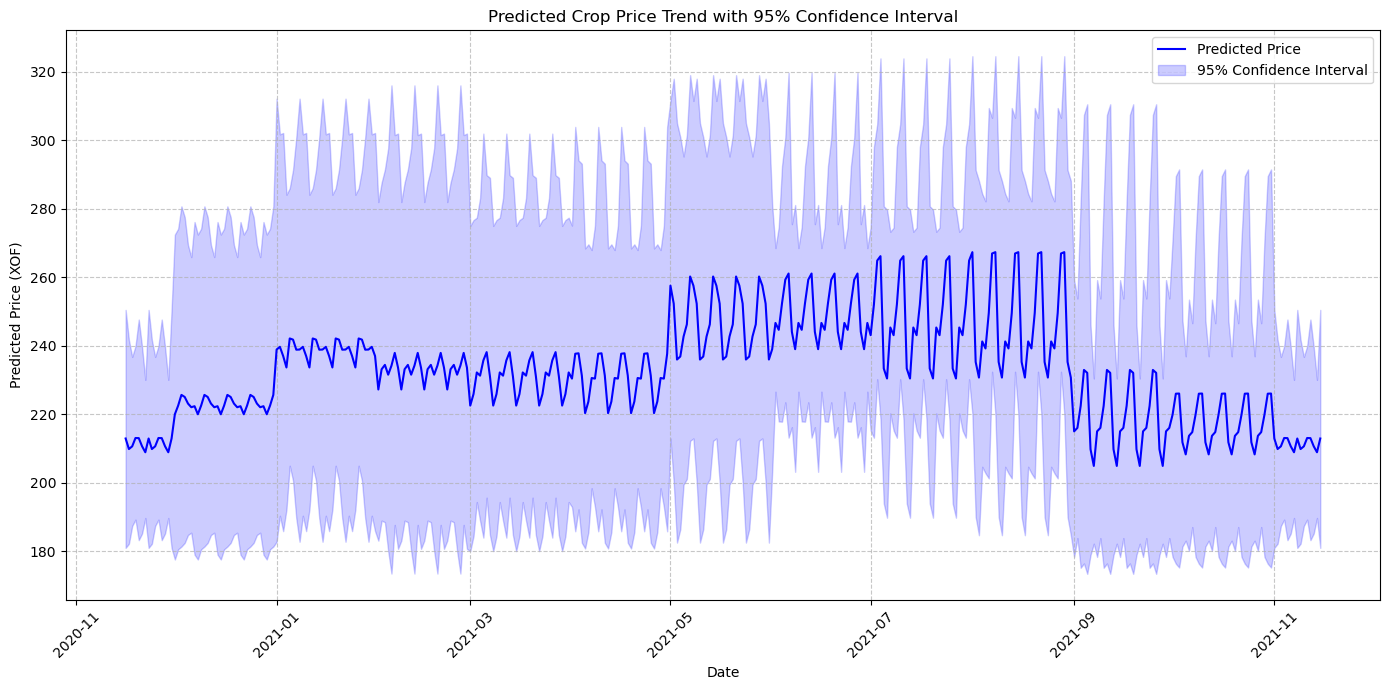

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an axes object
plt.figure(figsize=(14, 7))

# Plot the predicted price
sns.lineplot(x='date', y='predicted_price', data=predictions_df, label='Predicted Price', color='blue')

# Fill the area between lower and upper bounds for the 95% confidence interval
plt.fill_between(predictions_df['date'], predictions_df['lower_bound_price'], predictions_df['upper_bound_price'], color='blue', alpha=0.2, label='95% Confidence Interval')

# Add title and labels
plt.title('Predicted Crop Price Trend with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Predicted Price (XOF)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Improve layout and display the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
print(f"Random Forest Regressor Model Performance on X_test:")
print(f"Mean Squared Error (Testing): {mse_test_rf:.4f}")
print(f"R-squared (Testing): {r2_test_rf:.4f}")

Random Forest Regressor Model Performance on X_test:
Mean Squared Error (Testing): 0.0055
R-squared (Testing): 0.9161


### Overfitting Check: Training vs. Testing Performance

In [31]:
print(f"Random Forest Regressor Model Performance on X_train:")
print(f"Mean Squared Error (Training): {mse_train_rf:.4f}")
print(f"R-squared (Training): {r2_train_rf:.4f}")

print(f"\nRandom Forest Regressor Model Performance on X_test:")
print(f"Mean Squared Error (Testing): {mse_test_rf:.4f}")
print(f"R-squared (Testing): {r2_test_rf:.4f}")

Random Forest Regressor Model Performance on X_train:
Mean Squared Error (Training): 0.0008
R-squared (Training): 0.9878

Random Forest Regressor Model Performance on X_test:
Mean Squared Error (Testing): 0.0055
R-squared (Testing): 0.9161


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a more aggressive parameter grid to search for regularization
param_grid = {
    'max_depth': [15], # Keeping the best depth from previous run
    'min_samples_leaf': [2], # Keeping the best min_samples_leaf from previous run
    'max_features': [0.75], # Keeping the best max_features from previous run
    'n_estimators': [100, 200, 300] # Exploring different numbers of estimators
}

# Initialize a Random Forest Regressor model (keep random_state for reproducibility)
rf_base = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the new parameter grid
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

# Print the best parameters and best score
print(f"\nBest hyperparameters found: {grid_search.best_params_}")
print(f"Best R-squared score (from cross-validation): {grid_search.best_score_:.4f}")

# Get the best model
rf_model_tuned = grid_search.best_estimator_

Starting GridSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=200; total time=  20.8s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=200; total time=  20.9s
[CV] END max_depth=15, max_features=0.75, min_samples_leaf=2, n_estimators=200; total time=  20.8s

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions with the tuned model on the training set
y_train_pred_tuned = rf_model_tuned.predict(X_train)
mse_train_tuned = mean_squared_error(y_train, y_train_pred_tuned)
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)

# Make predictions with the tuned model on the testing set
y_test_pred_tuned = rf_model_tuned.predict(X_test)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)

print(f"Tuned Random Forest Regressor Model Performance on X_train:")
print(f"Mean Squared Error (Training): {mse_train_tuned:.4f}")
print(f"R-squared (Training): {r2_train_tuned:.4f}")

print(f"\nTuned Random Forest Regressor Model Performance on X_test:")
print(f"Mean Squared Error (Testing): {mse_test_tuned:.4f}")
print(f"R-squared (Testing): {r2_test_tuned:.4f}")

# Store the new best model in the variable `rf_model` for subsequent steps
rf_model = rf_model_tuned

Tuned Random Forest Regressor Model Performance on X_train:
Mean Squared Error (Training): 0.0083
R-squared (Training): 0.8724

Tuned Random Forest Regressor Model Performance on X_test:
Mean Squared Error (Testing): 0.0098
R-squared (Testing): 0.8493


In [34]:
import joblib

# Define the filename for your model
model_filename = 'random_forest_model.joblib'

# Save the trained model to the file
joblib.dump(rf_model, model_filename)

print(f"Model successfully saved as '{model_filename}'")
print("You can now download this file from your Colab file browser.")

Model successfully saved as 'random_forest_model.joblib'
You can now download this file from your Colab file browser.
